Import all the required libraries for data cleaning.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Read in the first dataset from 1980 and get a description of each column.

In [2]:
# Data gathering

df = pd.read_csv('doj_crime_data/1980.csv', error_bad_lines=False, encoding='ISO-8859-1', skiprows=[0, 1])[0:31].drop(['Unnamed: 6'], axis=1)
df

,Offenses,All races,White,Black,American Indian,Asian
0,All offenses,"10,287,860","7,605,750","2,500,420","122,640","59,050"
1,Murder and nonnegligent manslaughter,"20,040","10,380","9,360",160,150
2,Forcible rape,"31,380","16,140","14,760",280,200
3,Robbery,"146,270","60,410","84,140",780,950
4,Aggravated assault,"277,470","174,800","98,150","3,140","1,380"
5,Burglary,"513,300","360,720","145,830","3,970","2,780"
6,Larceny-theft,"1,191,900","809,930","358,080","12,110","11,780"
7,Motor vehicle theft,"138,300","94,910","40,640","1,430","1,320"
8,Arson,"19,800","15,660","3,950",110,80
9,Simple assault,"488,600","329,120","152,490","4,460","2,520"


In [3]:
df.describe()

,Offenses,All races,White,Black,American Indian,Asian
count,31,31,31,31,31,31
unique,31,31,31,31,31,31
top,Vandalism,"475,160","15,660","11,840","1,050","1,380"
freq,1,1,1,1,1,1


In [4]:
df.columns = df.columns.str.replace(' ', '_') # replace space with an underscore for each column name

In [5]:
df.dtypes

Offenses           object
All_races          object
White              object
Black              object
American_Indian    object
Asian              object
dtype: object

From the cell above we can see that all the columns have the object type. This will not be useful to us without converting the required columns to numeric/float.


In [6]:
# Firstly, let's update the index to the Offenses column 

df = df.set_index('Offenses')
df.index.name = None

df = df[df.columns].replace(',','', regex=True) # remove all commas from each column with numbers 
df = df.apply(pd.to_numeric) # convert objects to float

(White              0.003242
 Black              0.004277
 American_Indian    0.000046
 Asian              0.000103
 Name: Robbery, dtype: float64,
 White              0.422783
 Black              0.557712
 American_Indian    0.006030
 Asian              0.013380
 Name: Robbery, dtype: float64)

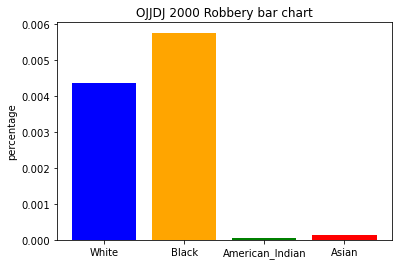

In [7]:
def yearly_bar_plot(year, offense='All offenses', plot=True):
    '''
        INPUT: 
            year - they year (between 1980-2019) you want to get a bar plat of
            offense - the type of offense commited
        OUTPUT: 
            Display a grouped bar chart showing all race and offense
    '''
    offense_list = ['All offenses', 'Murder and nonnegligent manslaughter', 'Forcible rape',
                   'Robbery', 'Aggravated assault', 'Burglary', 'Larceny-theft',
                   'Motor vehicle theft', 'Arson', 'Simple assault',
                   'Forgery and counterfeiting', 'Fraud', 'Embezzlement',
                   'Stolen property (buying, receiving, possessing)', 'Vandalism',
                   'Weapons (carrying, possessing, etc.)',
                   'Prostitution and commercialized vice',
                   'Sex offense (except forcible rape and prostitution)',
                   'Drug abuse violations', 'Gambling',
                   'Offenses against the family and children',
                   'Driving under the influence', 'Liquor laws', 'Drunkenness',
                   'Disorderly conduct', 'Vagrancy', 'All other offenses (except traffic)',
                   'Curfew and loitering', 'Violent Crime Index', 'Property Crime Index',
                   'Violent crimes*']
    if year in range(1880, 2020):
        
        if offense in offense_list:
            
            # Read in data and clean
            data = pd.read_csv('doj_crime_data/'+str(year)+'.csv', error_bad_lines=False, encoding='ISO-8859-1', skiprows=[0, 1])[0:31].drop(['Unnamed: 6'], axis=1)
            data.columns = data.columns.str.replace(' ', '_') # replace space with an underscore for each column name
            data = data.set_index('Offenses') # set index to the offense column
            data.index.name = None # remove new index label 
            data = data[data.columns].replace(',','', regex=True) # remove all commas from each column with numbers 
            data = data.apply(pd.to_numeric) # convert objects to float
            total_persons = data['All_races']['All offenses'] # get the total number of persons from all race
            total_person_offense = data['All_races'][offense]
            
            if plot:
#                 (data.loc[offense][1:]/total_persons).plot(kind="bar", color=['blue', 'orange', 'green', 'red']);
                color=['blue', 'orange', 'green', 'red']
                plt.bar(data.loc[offense][1:].index, data.loc[offense][1:].values/10287860, color=color)
                plt.title('OJJDJ ' + str(year) + ' ' + str(offense) + ' bar chart')
                plt.ylabel('percentage')
                data_series = data.loc[offense][1:]
                return (data_series/total_persons, data_series/total_person_offense) 
        else:
            print('The specified crime category does not exist. Please provide a valid category from the offense_list below:\n')
            print(offense_list)
    else:
        print('The year', year, 'is not available in this dataset, please enter year from 1980-2019')
        

yearly_bar_plot(2000, 'Robbery')

Now, to get a bar plot for the entire data sets (from 1980 to 2019), we need to add the float values for each column from each year. 

In [8]:
# The loop needs to start from 1981-2019 because the df from 1980 is considered as the initial df.
for year in range(1981, 2020):
    df_temp = pd.read_csv('doj_crime_data/'+str(year)+'.csv', error_bad_lines=False, encoding='ISO-8859-1', skiprows=[0, 1])[0:31].drop(['Unnamed: 6'], axis=1)
    df_temp.columns = df_temp.columns.str.replace(' ', '_') # replace space with an underscore for each column name
    df_temp = df_temp.set_index('Offenses')
    df_temp.index.name = None

    df_temp = df_temp[df_temp.columns].replace(',','', regex=True) # remove all commas from each column with numbers 
    df_temp = df_temp.apply(pd.to_numeric) # convert objects to float
    df = df.add(df_temp) 

df.dropna(axis = 0, how = 'all', inplace = True)

We can find that race has the leading number of arrests for each crime.

In [9]:
#Create a new column indicating which race between White and Black has the highest arrest recorded
df1 = df
df1['Prominent'] = np.where(df['White'] >= df['Black'], 1, 0)
df1

,All_races,White,Black,American_Indian,Asian,Prominent
Aggravated assault,16872610.0,10408040.0,6055000.0,213860.0,195780.0,1
All offenses,514840630.0,357843340.0,144913380.0,6847130.0,5236860.0,1
All other offenses (except traffic),132833070.0,87965570.0,41603620.0,1774140.0,1489820.0,1
Arson,646530.0,488510.0,145050.0,6820.0,6140.0,1
Burglary,13869220.0,9506020.0,4107370.0,127980.0,127930.0,1
Curfew and loitering,4094260.0,2834700.0,1158330.0,43230.0,58060.0,1
Disorderly conduct,25955390.0,16686440.0,8699230.0,410720.0,159030.0,1
Driving under the influence,58469980.0,50927170.0,6113400.0,793370.0,636110.0,1
Drug abuse violations,54391480.0,35529420.0,18085790.0,352650.0,423680.0,1
Drunkenness,27826890.0,22633960.0,4324540.0,748880.0,119620.0,1


Now, with the new added column, we can get the percentage of crimes that a White and Black person has been arrested for.

In [10]:
total_black = df1['Prominent']==0
black_perc = sum(total_black)/df1.shape[0]
black_perc

0.10714285714285714

In [11]:
total_white = df1['Prominent']==1
white_perc = sum(total_white)/df1.shape[0]
white_perc

0.8928571428571429

To clearly see the overall data set, a bar plot is used to display the result. First, we need to get a plot of the aggregated crimes for all race. 

In [12]:
all_race_tup = list(df['All_races'].items()) # get a list of tuples with the first element as the index and the second as value
all_race_tup.sort(key = lambda x: x[1]) # sort each tuple by the values in an increasing order
# all_race_tup

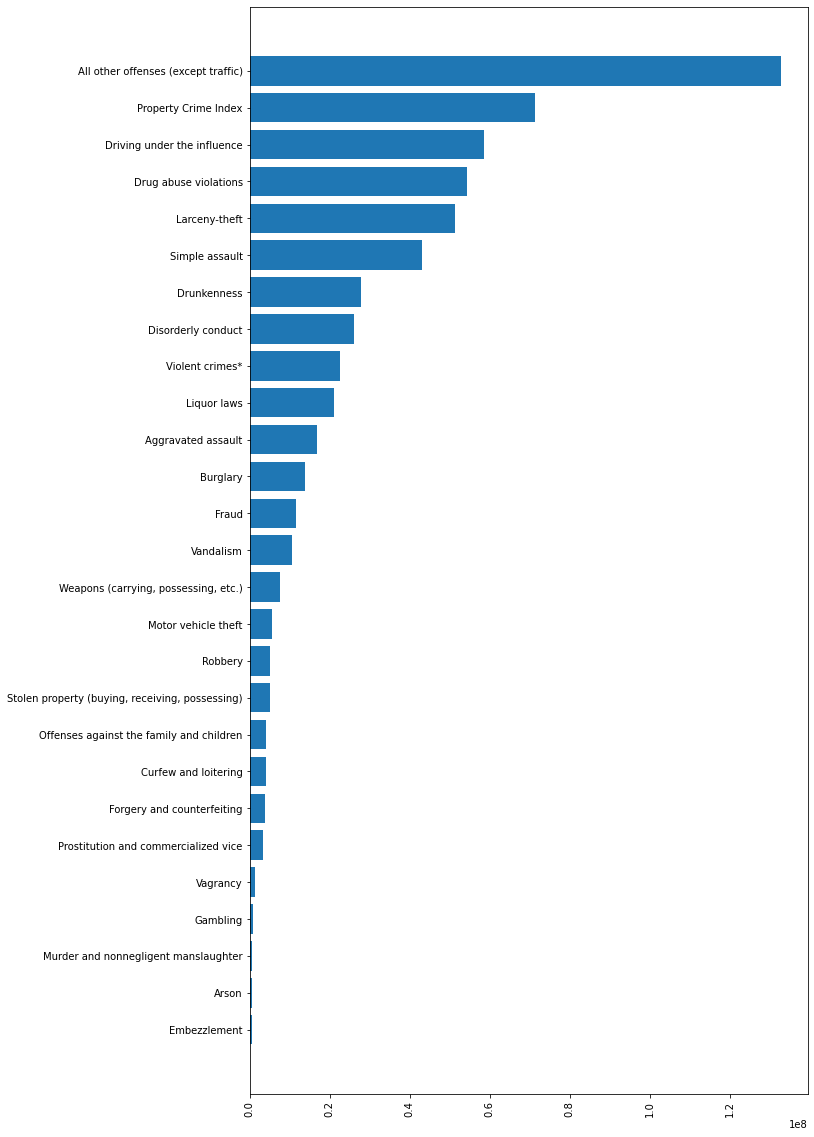

In [13]:
sum_all_race = sum(df['All_races'].drop('All offenses'))
x = [seq[0] for seq in all_race_tup][:-1] # get a list of all elements in first index except 'All_offenses'
y = [seq[1] for seq in all_race_tup][:-1] # get a list of all elements in second index except value for 'All_offenses'

plt.figure(figsize=(10, 20))
plt.barh(x, y, align='center')
plt.xticks(rotation=90)

plt.show()


To bettery visualize the data, we can use a stacked bar chart which shows the crime rates of all race except 'All offenses', 'Violent Crime Index', 'Property Crime Index', 'Violent crimes*'.

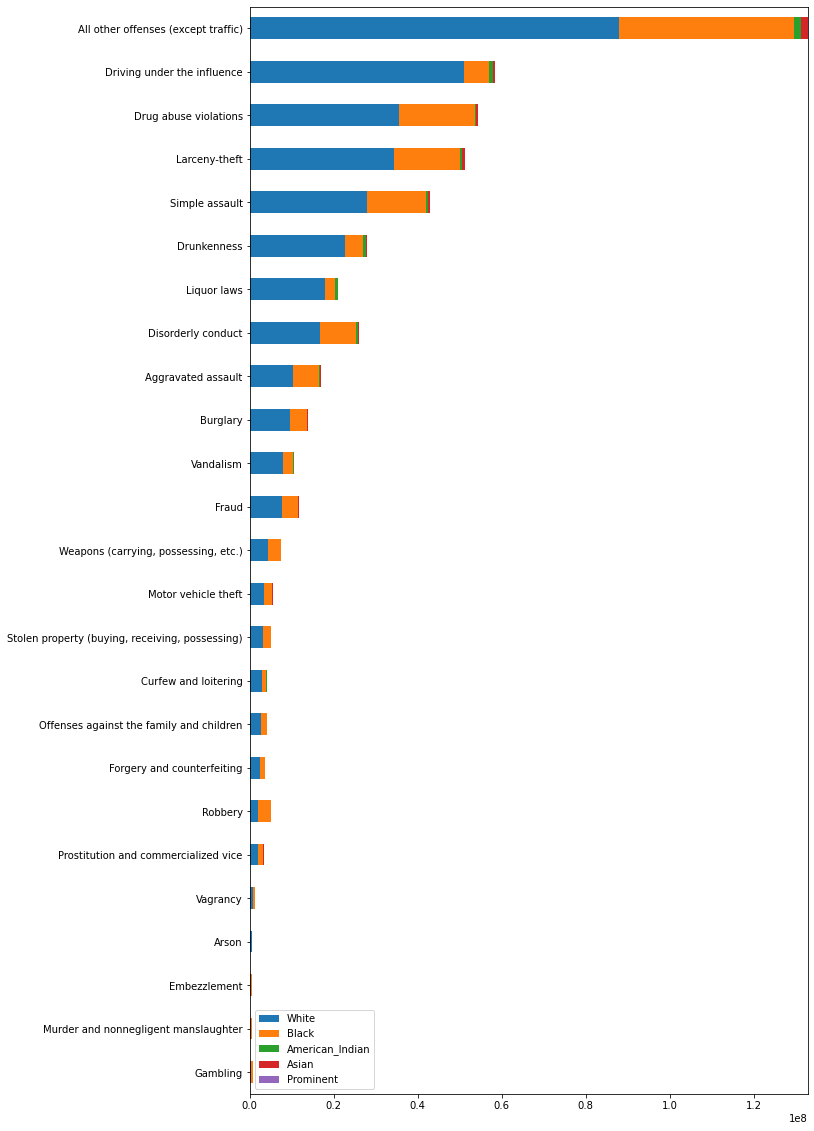

In [14]:
new_df = df.drop(['All offenses', 'Property Crime Index', 'Violent crimes*']).drop('All_races', axis=1).sort_values('White') # sort data frame by White column in increasing order
new_df.loc[:, new_df.columns].plot.barh(stacked=True, figsize=(10,20));

We can consider only property and violent crimes.

In [15]:
def_perc = df.drop(['All offenses', 'Property Crime Index', 'Violent crimes*'])
for idx in def_perc.index:
    def_perc.loc[idx] = def_perc.loc[idx]/sum(def_perc.loc[idx]) 

def_perc.head()

,All_races,White,Black,American_Indian,Asian,Prominent
Aggravated assault,0.499999,0.308429,0.179432,0.006337,0.005802,2.963376e-08
All other offenses (except traffic),0.500000,0.331113,0.156601,0.006678,0.005608,3.764122e-09
Arson,0.500003,0.377796,0.112177,0.005274,0.004748,7.733647e-07
Burglary,0.499999,0.342701,0.148075,0.004614,0.004612,3.605095e-08
Curfew and loitering,0.499996,0.346177,0.141457,0.005279,0.007090,1.221213e-07


Bar plot of percentage of each crime commited by each race.

In [21]:
violent_df = df.drop('All_races', axis=1).loc[['Violent crimes*', 'Property Crime Index']]
# df.loc[['Violent Crime Index', 'Violent crimes*', 'Property Crime Index']]

In [24]:
for idx in violent_df.index:
    violent_df.loc[idx] = violent_df.loc[idx]/sum(violent_df.loc[idx]) 

# Each cell in the violent_df contains the percentage of arrests made for each race.
violent_df

,White,Black,American_Indian,Asian,Prominent
Violent crimes*,0.563363,0.414516,0.011020,0.011101,4.410289e-08
Property Crime Index,0.668683,0.306976,0.011741,0.012599,1.401996e-08


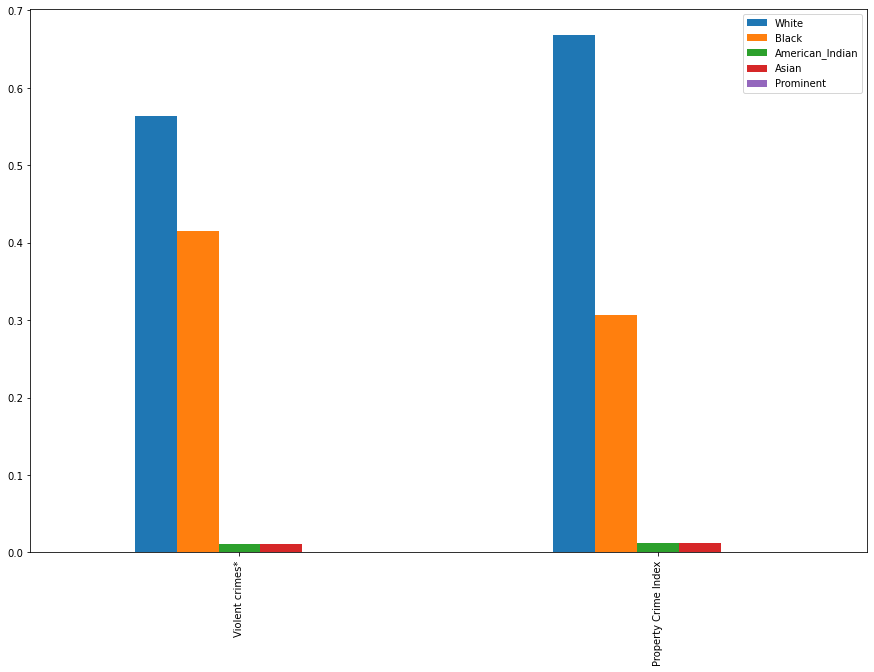

In [25]:
violent_df.loc[:,violent_df.columns].plot.bar(figsize=(15,10));